<a href="https://colab.research.google.com/github/Borg-JK/borgML/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Predicting Inflation Value**

## **(1) Formatting the Data**

### Setting Inflation data set to 2015 - 2023

In [ ]:
inflation = pd.read_csv("sample_data/global_inflation_data.csv")
to_drop = ["indicator_name", "2024"]
inflation.drop(columns = to_drop, inplace = True)
for i in inflation.columns[1:]:
  if int(i) < 2015:
    inflation.drop(columns = i, inplace = True)

inflation.head()

,country_name,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1
1,Albania,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8
2,Algeria,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0
3,Andorra,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2
4,Angola,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1


### Shaping final Data pandas dataframe

In [ ]:
data = pd.read_csv("sample_data/WHI_Inflation 2.csv")
data.info()
data.drop(columns = ["Headline Consumer Price Inflation","GDP deflator Index growth rate", "Continent/Region"], inplace = True)
data["Inflation"] = np.nan




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

### Adding Inflation data to Data

In [ ]:
diff_name_country = ["China", "Slovakia", "North Macedonia",
                     "South Sudan", "Swaziland", "Turkey"]

changed_name = ["China, People's Republic of", "Slovak Republic",
                "North Macedonia ", "South Sudan, Republic of", "Eswatini",
                "Türkiye, Republic of"]
inflation['country_name'] = inflation['country_name'].replace(changed_name, diff_name_country)


for index_inf, country_inf in enumerate(inflation["country_name"]):
  for index_data, country_data in enumerate(data["Country"]):
    if country_inf == country_data and (str(data['Year'][index_data]) in inflation.columns[1:]):
      data['Inflation'][index_data]=inflation[str(data['Year'][index_data])][index_inf]




### Lagging Variables

In [ ]:
lagged_variables = ["Energy Consumer Price Inflation", "Food Consumer Price Inflation",
                    "Official Core Consumer Price Inflation", "Producer Price Inflation"]
lagged_names = ["Energy_CPI_lag1", "Food_CPI_lag1",
                "Official_Core_CPI_lag1", "Producer_price_inflation_lag1"]

for country in data["Country"].unique():
  data.loc[data['Country'] == country, lagged_variables] = data.loc[data['Country'] == country, lagged_variables].shift(1)

data = data.rename(columns = dict(zip(lagged_variables, lagged_names)))
corr_matrix = data.iloc[:, 1:].corr()

data.head(20)

print(data.shape)

(1232, 14)


### Dropping NaN columns

In [ ]:
data.drop(columns = ["Official_Core_CPI_lag1", "Producer_price_inflation_lag1"], inplace = True)
data.dropna(subset = "Inflation", inplace = True)
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data.head()


(1228, 12)
(964, 12)


,Country,Year,Energy_CPI_lag1,Food_CPI_lag1,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Inflation
1,Afghanistan,2016,-4.250000,-0.840000,3.3600,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,4.38
2,Afghanistan,2017,2.070000,5.670000,3.7940,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.98
3,Afghanistan,2018,4.440000,6.940000,3.6320,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,0.63
4,Afghanistan,2019,1.474185,-1.045952,3.2030,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,2.30
5,Afghanistan,2020,-2.494359,3.794770,2.5669,0.300706,0.356434,0.266052,0.00000,0.135235,0.001226,5.44


### Dropping Country and Year

In [ ]:
data.drop(data[data["Country"].isin(["Argentina", "Lebanon", "Zimbabwe", "Turkey"])].index, inplace=True)
data.drop(columns = ["Country", "Year"], inplace = True)
data.head()

,Energy_CPI_lag1,Food_CPI_lag1,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Inflation
1,-4.250000,-0.840000,3.3600,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,4.38
2,2.070000,5.670000,3.7940,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.98
3,4.440000,6.940000,3.6320,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,0.63
4,1.474185,-1.045952,3.2030,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,2.30
5,-2.494359,3.794770,2.5669,0.300706,0.356434,0.266052,0.00000,0.135235,0.001226,5.44


## **(2) RANDOM FOREST MODEL**

## Getting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = "Inflation")
y = data["Inflation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest + Grid Search

In [ ]:
from inspect import modulesbyfile
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

modelrf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50, 100 , 200],          # Number of trees in the forest
    "max_depth": [None, 10, 15, 20],         # Maximum depth of trees
    "min_samples_split": [3, 5, 7],         # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 5]            # Minimum samples at leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator = modelrf,
    param_grid = param_grid,
    scoring = "neg_root_mean_squared_error",
    cv = 5,            # 5-fold cross-validation
    n_jobs = -1,       # Use all CPU cores for faster computation
    verbose = 2        # Print progress
)



# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
test_score = best_rf.score(X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

## Interpretations of Results

In [ ]:
pred_y = best_rf.predict(X_test)
def show_incorrect_preds(pred_y, test_X, test_y):
    incorrect_idxs = pred_y!=test_y

    incorrect_pred_y = pred_y[incorrect_idxs]
    incorrect_test_X = test_X[incorrect_idxs]
    incorrect_test_y = test_y[incorrect_idxs]

    print("Number of incorrect predictions:", incorrect_pred_y.shape[0])

show_incorrect_preds(pred_y, X_test, y_test)

Number of incorrect predictions: 80


In [ ]:
print("Random Forest")

def get_accuracies(model, train_X, train_y, test_X, test_y):
    print("Training score:", model.score(train_X, train_y))
    print("Testing score: ", model.score(test_X, test_y))


get_accuracies(best_rf, X_train, y_train, X_test, y_test)

Random Forest
Training score: 0.8212223654421875
Testing score:  0.5578402985639032


     True Values  Predictions
393          1.9     1.264971
96           4.9     6.705533
265          1.6     1.474418
820         -2.5     3.124186
863          0.7     1.108165
126          2.8     3.847763
561          8.0     5.896529
115          1.8     0.799584
666          1.0     3.413150
400         17.5    10.893784


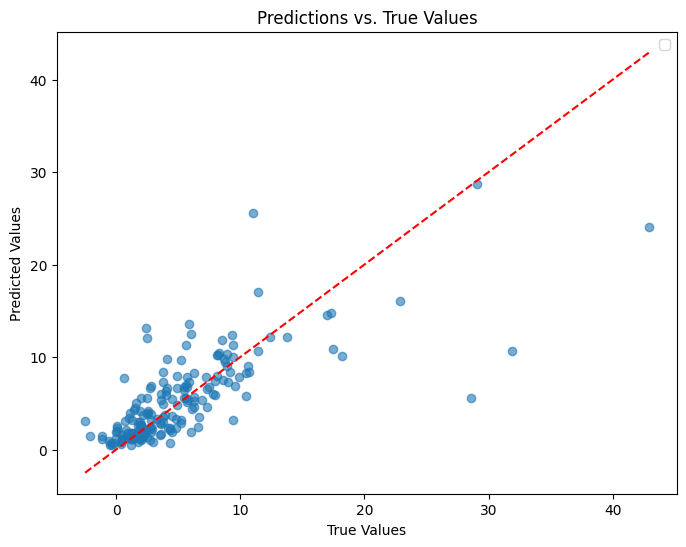

In [ ]:
pred_y = best_rf.predict(X_test)
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({"True Values": y_test, "Predictions": pred_y})
print(comparison_df.head(10))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_y, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 45-degree reference line
plt.show()

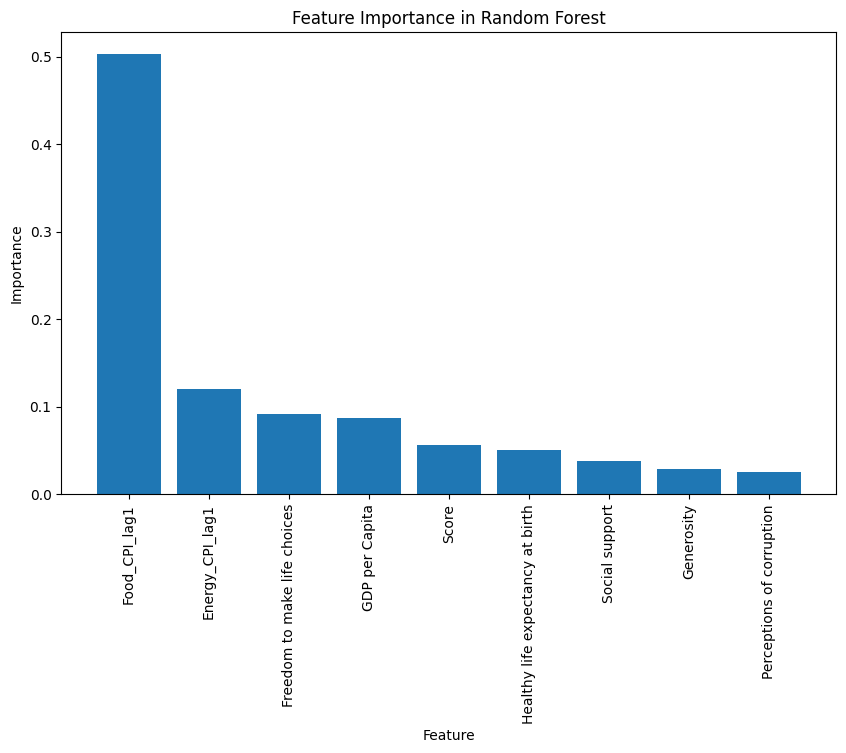

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns  # Ensure train_X is a DataFrame

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

## (3) **SVM MODEL**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define hyperparameter grid
param_grid_svm = {
    'kernel': ['linear', 'rbf'],  # Different kernel functions
    'C': [0.1, 1, 10],  # Regularization strength
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Kernel coefficient
}

# Create the GridSearchCV object
optimal_params_svm = GridSearchCV(
    estimator=SVR(),            # Support Vector Regression model
    param_grid=param_grid_svm,  # Hyperparameter grid
    cv=5,                       # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",               # Use root_mean_squared
    verbose=1,                  # Show progress
    n_jobs=-1                   # Use all CPU cores
)

# Fit the model
optimal_params_svm.fit(X_train, y_train)
best_svm = optimal_params_svm.best_estimator_

# Print best parameters and score
print("Best parameters:", optimal_params_svm.best_params_)
print("Best R² score:", optimal_params_svm.best_score_)

In [ ]:
print("SVM")

def get_accuracies(model, train_X, train_y, test_X, test_y):
    print("Training score:", model.score(train_X, train_y))
    print("Testing score: ", model.score(test_X, test_y))


get_accuracies(best_svm, X_train, y_train, X_test, y_test)

# Predicting Inflation Movement

## Formatting Data

In [ ]:
inflation = pd.read_csv("sample_data/global_inflation_data.csv")
to_drop = ["indicator_name", "2024"]
inflation.drop(columns = to_drop, inplace = True)
for i in inflation.columns[1:]:
  if int(i) < 2015:
    inflation.drop(columns = i, inplace = True)

data = pd.read_csv("sample_data/WHI_Inflation 2.csv")
data.info()
data.drop(columns = ["Headline Consumer Price Inflation","GDP deflator Index growth rate", "Continent/Region"], inplace = True)
data["Inflation"] = np.nan

diff_name_country = ["China", "Slovakia", "North Macedonia",
                     "South Sudan", "Swaziland", "Turkey"]

changed_name = ["China, People's Republic of", "Slovak Republic",
                "North Macedonia ", "South Sudan, Republic of", "Eswatini",
                "Türkiye, Republic of"]
inflation['country_name'] = inflation['country_name'].replace(changed_name, diff_name_country)


for index_inf, country_inf in enumerate(inflation["country_name"]):
  for index_data, country_data in enumerate(data["Country"]):
    if country_inf == country_data and (str(data['Year'][index_data]) in inflation.columns[1:]):
      data['Inflation'][index_data]=inflation[str(data['Year'][index_data])][index_inf]
lagged_variables = ["Energy Consumer Price Inflation", "Food Consumer Price Inflation",
                    "Official Core Consumer Price Inflation", "Producer Price Inflation", "Inflation"]
lagged_names = ["Energy_CPI_lag1", "Food_CPI_lag1",
                "Official_Core_CPI_lag1", "Producer_price_inflation_lag1", "Inflation lags"]
data["Inflation store"] = data["Inflation"]
for country in data["Country"].unique():
  data.loc[data['Country'] == country, lagged_variables] = data.loc[data['Country'] == country, lagged_variables].shift(1)

data = data.rename(columns = dict(zip(lagged_variables, lagged_names)))


data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

,Country,Year,Energy_CPI_lag1,Food_CPI_lag1,Official_Core_CPI_lag1,Producer_price_inflation_lag1,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Inflation lags,Inflation store
0,Afghanistan,2015,NaN,NaN,NaN,NaN,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,NaN,-0.66
1,Afghanistan,2016,-4.250000,-0.840000,0.219999,NaN,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,-0.66,4.38
2,Afghanistan,2017,2.070000,5.670000,5.192760,NaN,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.38,4.98
3,Afghanistan,2018,4.440000,6.940000,5.423228,NaN,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,4.98,0.63
4,Afghanistan,2019,1.474185,-1.045952,-0.126033,NaN,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,0.63,2.30


### Dropping NaN Columns

In [ ]:
data.drop(columns = ["Official_Core_CPI_lag1", "Producer_price_inflation_lag1"], inplace = True)
data.dropna(subset = "Inflation store", inplace = True)
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data.head()

data.drop(data[data["Country"].isin(["Argentina", "Lebanon", "Zimbabwe", "Turkey"])].index, inplace=True)
data.drop(columns = ["Country", "Year"], inplace = True)
data.head()

(1228, 13)
(964, 13)


,Energy_CPI_lag1,Food_CPI_lag1,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Inflation lags,Inflation store
1,-4.250000,-0.840000,3.3600,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,-0.66,4.38
2,2.070000,5.670000,3.7940,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.38,4.98
3,4.440000,6.940000,3.6320,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,4.98,0.63
4,1.474185,-1.045952,3.2030,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,0.63,2.30
5,-2.494359,3.794770,2.5669,0.300706,0.356434,0.266052,0.00000,0.135235,0.001226,2.30,5.44


### Producing Binary Movement variable

In [ ]:
data["Inflation Bin Movement"] = np.nan
for index, inflation in data["Inflation store"].items():
  data["Inflation Bin Movement"][index] = 1 if inflation > data["Inflation lags"][index] else 0

data.drop(columns = ["Inflation store", "Inflation lags"], inplace = True)

data.head()

,Energy_CPI_lag1,Food_CPI_lag1,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Inflation Bin Movement
1,-4.250000,-0.840000,3.3600,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,1.0
2,2.070000,5.670000,3.7940,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,1.0
3,4.440000,6.940000,3.6320,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,0.0
4,1.474185,-1.045952,3.2030,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,1.0
5,-2.494359,3.794770,2.5669,0.300706,0.356434,0.266052,0.00000,0.135235,0.001226,1.0


## Random Forest Model


In [ ]:
from inspect import modulesbyfile
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = data.drop(columns = "Inflation Bin Movement")
y = data["Inflation Bin Movement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelrf = RFC(random_state=42)
param_grid = {
    "n_estimators": [200, 300],          # Number of trees in the forest
    "max_depth": [None, 10, 15, 20],         # Maximum depth of trees
    "min_samples_split": [7, 9],         # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 3]            # Minimum samples at leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator = modelrf,
    param_grid = param_grid,
    scoring = "f1",
    cv = 5,            # 5-fold cross-validation
    n_jobs = -1,       # Use all CPU cores for faster computation
    verbose = 2        # Print progress
)



# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
test_score = best_rf.score(X_test, y_test)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 300}


Random Forest
Training score: 0.9694656488549618
Testing score:  0.7163120567375887
     True Values  Predictions
393          1.0          1.0
96           0.0          0.0
265          1.0          1.0
820          0.0          1.0
863          1.0          1.0
126          0.0          0.0
561          1.0          1.0
115          1.0          1.0
666          0.0          0.0
400          1.0          0.0


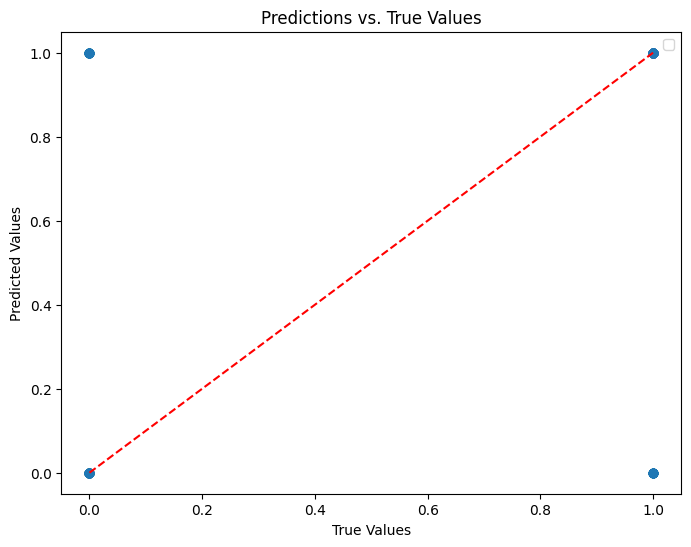

In [ ]:
pred_y = best_rf.predict(X_test)
print("Random Forest")

def get_accuracies(model, train_X, train_y, test_X, test_y):
    print("Training score:", model.score(train_X, train_y))
    print("Testing score: ", model.score(test_X, test_y))


get_accuracies(best_rf, X_train, y_train, X_test, y_test)

import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({"True Values": y_test, "Predictions": pred_y})
print(comparison_df.head(10))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_y, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. True Values")
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 45-degree reference line
plt.show()

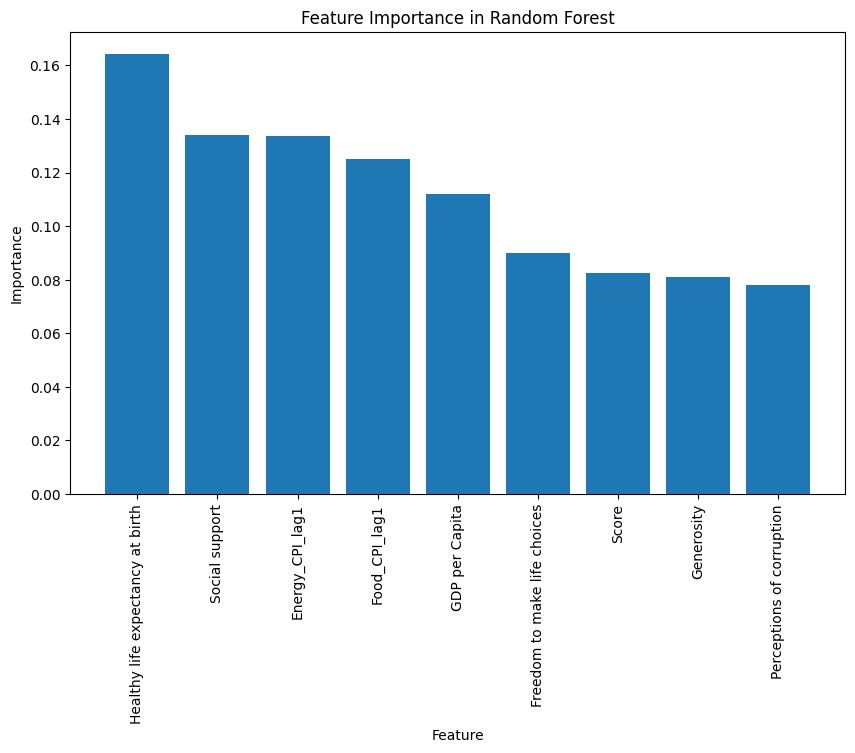

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns  # Ensure train_X is a DataFrame

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()